<ipython-input-1-22a1c61fea34>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time,frex,pwr,vmin=0,vmax=9)


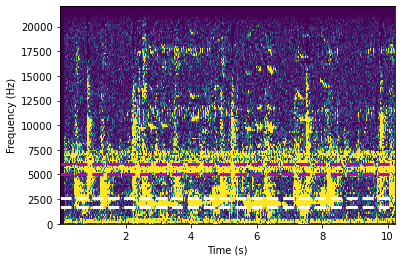

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.io as sio
import scipy.io.wavfile
import copy
# load in birdcall
fs,bc = scipy.io.wavfile.read('XC403881.wav')


# time-frequency analysis via spectrogram (see section on spectral methods)
frex,time,pwr = scipy.signal.spectrogram(bc[:,0],fs)
plt.pcolormesh(time,frex,pwr,vmin=0,vmax=9)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')


# frequency ranges
frange = [ [1700, 2600], [5100, 6100] ]

# draw boundary lines on the plot
colorz = 'wm';
for fi in range(0,len(frange)):
    plt.plot([time[0],time[-1]],[frange[fi][0],frange[fi][0]],colorz[fi]+'--',linewidth=3)
    plt.plot([time[0],time[-1]],[frange[fi][1],frange[fi][1]],colorz[fi]+'--',linewidth=3)

plt.show()

In [4]:
## compute and apply FIR filters

# initialize output matrix
filteredSig = np.zeros((2,2,len(bc)))

# loop over filters
for filteri in range(len(frange)):
    
    # design filter kernel
    order    = round( 10*(fs/frange[filteri][0]) )
    order    += ~order%2
    filtkern = signal.firwin(order,frange[filteri],fs=fs,pass_zero=False)
    
    # loop over channels
    for chani in range(2):
        
        # get data from this channel
        dat1chan = bc[:,chani]
        
        # zero-phase-shift filter
        fsig = signal.filtfilt(filtkern,1,dat1chan)
        # enter into the matrix
        filteredSig[filteri,chani,:] = fsig


In [5]:
## play sounds

from IPython.display import Audio

# # original
# Audio(np.array(bc[:,0]), rate=fs)

# # lower frequency range
# Audio(np.array(filteredSig[0,0,:]), rate=fs)

# higher frequency range
Audio(np.array(filteredSig[1,0,:]), rate=fs)
